# Trabalho #6 - Classificação de Múltiplas Classes

Nesse trabalho você vai desenvolver uma rede neural tipo densa usando a plataforma TensorFlow-Keras para realizar uma tarefa de classificação de múltiplas classes.

A tarefa de classificação desse trabalho consiste na identificação de sinais de mão a partir de imagens. 

Essa mesma tarefa você vai realizar novamente no próximo trabalho mas usando uma rede neural tipo convolucional para verificar a diferença de desempenho das redes neurais tipo densa e convolucional para processar imagens. 

## Coloque os nomes e RAs dos alunos que fizeram esse trabalho

Nome e número dos alunos da equipe:

Aluno 1: Igor Amaral Correa 20.83992-8

Aluno 2: 


Em primeiro lugar é necessário importar alguns pacotes do Python que serão usados nesse trabalho:
- [numpy](www.numpy.org) pacote de cálculo científico com Python
- [matplotlib](http://matplotlib.org) biblioteca para gerar gráficos em Python
- utils.py função para ler banco de dados 

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

## 1 - Visão geral do problema ##

**Definição do problema**: 

O objetivo desse problema é desenvolver uma RNA que recebe como entrada uma imagem de sinais de mão e avalia a probabilidade dos dedos da mão mostrarem um número de 0 a 5 e determina qual o número mais provável entre os seis possíveis.

O banco de dados usado nesse trabalho é SIGNS, que consiste de imagens de sinais de mão criado por Andre Ng (deeplearning.ai). Esse banco de dados pode ser obtido no link: https://github.com/cs230-stanford/cs230-code-examples/tree/master/tensorflow/vision

O banco de dados possui 1080 exemplos de treinamento e 120 exemplos de teste. Cada exemplo consiste de uma imagem colorida associada a um rótulo de 6 classes. A Figura abaixo mostra alguns exemplos dessas imagens.

<img src="https://github.com/pigortekids/Notas4/blob/master/T6/SIGNS.png?raw=1" style="width:800px;height:300px;">

## 2 - Dados de treinamento

Os dados que iremos utilizar nesse trabalho estão nos arquivos train_signs.h5 e test_signs.h5.

Características dos dados:

- As imagens são coloridas e estão no padrão RGB;
- Cada imagem tem 64 pixels de altura e 64 pixels de largura;
- O valor da intensidade luminosa de cada cor é um número inteiro entre 0 e 255;
- As saídas representam o rótulo do sinal de mão mostrado na imagem, sendo um número inteiro de 0 a 5. 



### 2.1 - Leitura dos dados

Para iniciar o trabalho é necessário ler o arquivo de dados. Assim, execute o código da célula abaixo para ler o arquivo de dados.

In [4]:
# Leitura do arquivo de dados
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
print("X_train shape:", X_train_orig.shape, "y_train shape:", Y_train_orig.shape)
print("X_test shape:", X_test_orig.shape, "y_test shape:", Y_test_orig.shape)

X_train shape: (1080, 64, 64, 3) y_train shape: (1, 1080)
X_test shape: (120, 64, 64, 3) y_test shape: (1, 120)


Pela dimensão dos tensores com os dados de treinamento e teste temos:

- 1080 imagens de treinamento com dimensão de 64 por 64 por 3 pixels;
- 120 imagens de teste com dimensão de 64 por 64 por 3 pixels.


Execute a célula a seguir para visualizar um exemplo de uma imagem do banco de dados com a sua classe. Altere o valor da variável 'index' e execute a célula novamente para visualizar mais exemplos diferentes.

y = 5


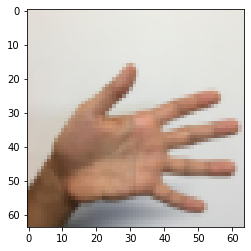

In [5]:
# Exemplo de uma imagem
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### 2.2 - Processamento dos dados

Para os dados poderem ser usados para o desenvolvimento da RNA devemos primeiramente processá-los.

Para isso devemos realizar as seguintes etapas:

- Dividir os dados de treinamento nos conjuntos de treinamento e validação;
- Os valores dos pixels em uma imagem é um número inteiro que deve ser transformado em número real para ser usado em cálculos;
- Redimensionar as imagens para transfroma-las em um vetor linha;
- Normalizar as imagens de forma que os valores dos pixels fique entre 0 e 1.

### Exercício #1: Conjuntos de treinamento e validação

Na célula abaixo crie um código para para dividir o conjunto de treinamento nos conjuntos de treinamento e validação. Use 960 imagens para o conjunto de treinamento e 120 imagens para o conjunto de validação. Não se esqueça de separar também as classes.

Nessa célula também transponha os vetores das saídas para que o primeiro eixo seja o dos exemplos e o segundo eixo o das classes.

In [9]:
# PARA VOCÊ FAZER: Divisão dos dados de treinamento em dados de treinamento e validação

# Dados de entrada
### COMECE AQUI ### (≈ 2 linhas)
X_train = X_train_orig[:960]
X_val = X_train_orig[960:]
### TERMINE AQUI ###

# Dados de saída
### COMECE AQUI ### (≈ 3 linhas)
Y_train = Y_train_orig[:, :960].transpose()
Y_val = Y_train_orig[:, 960:].transpose()
Y_test = Y_test_orig.transpose()
### TERMINE AQUI ###

print("Dimensão do tensor de dados de entrada de treinamento =", X_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", X_val.shape)
print("Dimensão do tensor de dados de saída de treinamento =", Y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", Y_val.shape)
print("Dimensão do tensor de dados de saída de test =", Y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (960, 64, 64, 3)
Dimensão do tensor de dados de entrada de validação = (120, 64, 64, 3)
Dimensão do tensor de dados de saída de treinamento = (960, 1)
Dimensão do tensor de dados de saída de validação = (120, 1)
Dimensão do tensor de dados de saída de test = (120, 1)


**Saída esperada:**

    Dimensão do tensor de dados de entrada de treinamento = (960, 64, 64, 3)
    Dimensão do tensor de dados de entrada de validação = (120, 64, 64, 3)
    Dimensão do tensor de dados de saída de treinamento = (960, 1)
    Dimensão do tensor de dados de saída de validação = (120, 1)
    Dimensão do tensor de dados de saída de test = (120, 1)

### Exercício #2: Normalização e redimensionameto dos dados de entrada

Na célula abaixo crie um código para normalizar e transformar as imagens em números reais, dividindo por 255. Após essa operação, redimensionar os dados de entrada para ficarem na forma de vetor linha de dimensão `num_px * num_px * 3`.

In [10]:
# PARA VOCÊ FAZER: Normalização dos dados de entrada

# Guarda dimensão das imagens
num_px = X_train.shape[1]
print("Numero de colunas e linhas das imagens de entrada=", num_px)

# Transformação dos dados em números reais
### Comece AQUI ### (≈ 3 linhas)
X_train_float = X_train / 255
X_val_float = X_val / 255
X_test_float = X_test_orig / 255
### TERMINE AQUI ###

# Redimensionamento dos dados de entrada
### COMECE AQUI ### (≈ 6 linhas)
m_train = X_train.shape[0]
X_train_flat = np.reshape(X_train_float, ( X_train_float.shape[0], num_px * num_px * 3 ))
m_test = X_test_orig.shape[0]
X_test_flat = np.reshape(X_test_float, ( X_test_float.shape[0], num_px * num_px * 3 ))
m_val = X_val.shape[0]
X_val_flat = np.reshape(X_val_float, ( X_val_float.shape[0], num_px * num_px * 3 ))
### TERMINE AQUI ###

print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train_flat.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_test_flat.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test_flat.shape)

# Para verificar se os resultados estão corretos
print("Primeiros 5 elementos da primeira imagem de treinamento = ", X_train_flat[0,:5])
print("Primeiros 5 elementos da primeira imagem de validação = ", X_val_flat[0,:5])
print("Primeiros 5 elementos da primeira imagem de teste = ", X_test_flat[0,:5])

Numero de colunas e linhas das imagens de entrada= 64
Dimensão dos dados de entrada do conjunto de treinamento:  (960, 12288)
Dimensão dos dados de entrada do conjunto de validação:  (120, 12288)
Dimensão dos dados de entrada do conjunto de teste:  (120, 12288)
Primeiros 5 elementos da primeira imagem de treinamento =  [0.89019608 0.8627451  0.83921569 0.89019608 0.86666667]
Primeiros 5 elementos da primeira imagem de validação =  [0.89803922 0.85882353 0.81176471 0.89411765 0.85882353]
Primeiros 5 elementos da primeira imagem de teste =  [0.90588235 0.87843137 0.84705882 0.90980392 0.87843137]


**Saída esperada:**

    Numero de colunas e linhas das imagens de entrada= 64
    Dimensão dos dados de entrada do conjunto de treinamento:  (960, 12288)
    Dimensão dos dados de entrada do conjunto de validação:  (120, 12288)
    Dimensão dos dados de entrada do conjunto de teste:  (120, 12288)
    Primeiros 5 elementos da primeira imagem de treinamento =  [0.8901961 0.8627451 0.8392157 0.8901961 0.8666667]
    Primeiros 5 elementos da primeira imagem de validação =  [0.8980392  0.85882354 0.8117647  0.89411765 0.85882354]
    Primeiros 5 elementos da primeira imagem de teste =  [0.90588236 0.8784314  0.84705883 0.9098039  0.8784314 ]

### Exercício #3: Codificação das classes

As classes dos sinais são identificadas por um número inteiro que varia de 0 a 5. Porém, a saída esperada de uma RNA para um problema de classificação de múltiplas classes é um vetor de dimensão igual ao número de classes, que no caso são 6 classes. Cada elemento desse vetor representa a probabilidade da imagem ser um sinal. Assim, devemos transformar as saídas reais do conjunto de dados em um vetor linha de 6 elementos, com todos os elementos iguais a zero a menos do correspondente ao da classe do sinal, que deve ser igual a um.

A função que realiza essa transformação é conhecida na literatura de "one-hot-encoding”, que no Keras é chamada de `to_categorical`. Essa função pertence à classe de utilidades do Keras que deve ser importada antes de ser utilizada. 

Implemente na célula abaixo a transformação dos dados de saída usando a função `to_categorical` do keras.

In [12]:
# PARA VOCÊ FAZER: Coficação das classes dos exemplos 

# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
### COMECE AQUI ### (≈ 3 linhas)
Y_train_hot = to_categorical(Y_train)
Y_val_hot = to_categorical(Y_val)
Y_test_hot = to_categorical(Y_test)
### Termine AQUI ###

print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test_hot.shape)

# Para verificar se os resultados estão corretos
print("Primeiras 5 saídas dos exemplos de treinamento = ", Y_train_hot[:5,:])
print("Primeiras 5 saídas dos exemplos de validação = ", Y_val_hot[:5,:])
print("Primeiras 5 saídas dos exemplos de teste = ", Y_test_hot[:5,:])

Dimensão dos dados de saída do conjunto de treinamento:  (960, 6)
Dimensão dos dados de saída do conjunto de validação:  (120, 6)
Dimensão dos dados de saída do conjunto de teste:  (120, 6)
Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]
Primeiras 5 saídas dos exemplos de validação =  [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]
Primeiras 5 saídas dos exemplos de teste =  [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]]


**Saída esperada:**

    Dimensão dos dados de saída do conjunto de treinamento:  (960, 6)
    Dimensão dos dados de saída do conjunto de validação:  (120, 6)
    Dimensão dos dados de saída do conjunto de teste:  (120, 6)
    Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 0. 1.]
     [1. 0. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 0. 0. 1.]
     [0. 0. 1. 0. 0. 0.]]
    Primeiras 5 saídas dos exemplos de validação =  [[0. 1. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 1.]
     [0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 1.]
     [0. 0. 0. 1. 0. 0.]]
    Primeiras 5 saídas dos exemplos de teste =  [[1. 0. 0. 0. 0. 0.]
     [1. 0. 0. 0. 0. 0.]
     [1. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 1.]
     [0. 1. 0. 0. 0. 0.]]
    
**Visualização da entrada e saída correspondente**

Execute a célula abaixo para verificar se o seu programa está realizando de fato o que você espera. No código abaixo index é o número sequencial da imagem. Tente trocar a imagem, mudando a variável index, usando valores entre 0 e 959, para visualizar outros exemplos.

Classe numérica:  [3] , Vetor de saída correspondentes:  [0. 0. 0. 1. 0. 0.]


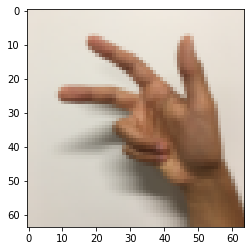

In [13]:
# Exemplo de saída
index = 100
print("Classe numérica: ", Y_train[index], ", Vetor de saída correspondentes: ", Y_train_hot[index])
plt.imshow(X_train_orig[index], cmap='gray', vmin=0, vmax=255)

**Saída esperada:**

Classe numérica:  [3] , Vetor de saída correspondentes:  [0. 0. 0. 1. 0. 0.]

## 3 - Criação e treinamento da RNA

Nesse trabalho você irá usar uma RNA com camadas do tipo densas e com isso poderá verificar a dificuldade de realizar essa tarefa de classificação com esse tipo de RNA.

### Exercício #4: Criação e configuração da RNA

Você vai usar uma RNA com 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu;
- Segunda camada: número de neurônios n2, função de ativação ReLu;
- Camada de saída: número de neurônio n3, função de ativação softmax.

Na célula abaixo crie uma função que recebe a dimensão dos dados de entrada e os números de neurônios das 3 camadas e configura a RNA de acordo com as características acima.

In [0]:
# PARA VOCÊ FAZER: Função para configuração da RNA

# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(data_shape, n1, n2, n3):
    """
    Essa função configura uma rede neural deep-learnig
    
    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída
       
    Retorna: modelo da rede neural
    """
    # Inicialização do gerador de números aleatórios para permitir verificar resultados
    np.random.seed(3)
    
    model = models.Sequential()
    
    # Adicione as camadas em seu modelo de RNA
    #### COMECE AQUI ### (≈ 3 linhas)
    model.add(layers.Dense(units=n1, activation='relu', input_dim=data_shape[0]))
    model.add(layers.Dense(units=n2, activation='relu'))
    model.add(layers.Dense(units=n3, activation='softmax'))
    ### TERMINE AQUI ###
    
    return model

Defina os números de neurônios das camadas intermediárias e de saída e crie a RNA usando a função `build_model` criada na célula anterior. Utilize n1 = 64, n2 = 32, n3 = 6. Após criar a RNA utilize o método summary para visualizar a sua rede.

In [15]:
# PARA VOCÊ FAZER: criação da RNA

# Dimensão dos dados de entrada
#### COMECE AQUI ### (≈ 1 linhas) 
data_shape = (12288,)
### TERMINE AQUI ###

# Definição dos números de neurônios das camadas
#### COMECE AQUI ### (≈ 3 linhas)
n1 = 64
n2 = 32
n3 = 6
### TERMINE AQUI ###

# Cria rede neural deep learning e apresenta sua configuração
#### COMECE AQUI ### (≈ 2 linhas)
rna = build_model(data_shape, n1, n2, n3)
rna.summary()
### TERMINE AQUI ###


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                786496    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 788,774
Trainable params: 788,774
Non-trainable params: 0
_________________________________________________________________


**Saída esperada:**

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    dense (Dense)                (None, 64)                786496    
    _________________________________________________________________
    dense_1 (Dense)              (None, 32)                2080      
    _________________________________________________________________
    dense_2 (Dense)              (None, 6)                 198       
    =================================================================
    Total params: 788,774
    Trainable params: 788,774
    Non-trainable params: 0
    _________________________________________________________________


### Exercício #5: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização do gradiente descendente com momento. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- taxa de aprendizado = 0,001;
- constante beta = 0,9;
- decay = 0;
- nesterov = True
- batch_size = 120;
- número de épocas = 600.

**Importante:** Escolha o parâmetro verbose=0 no método `fit` para evitar de imprimir os resultados das 600 épocas de treinamento.

In [0]:
# PARA VOCÊ FAZER: compilação e treinamento da RNA usando o método do gradiente descendente com momento

# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otimizador
### COMECE AQUI ### (≈ 2 linhas)
mom = optimizers.SGD(lr=0.001, decay=0, momentum=0.9, nesterov=True)
rna.compile(loss='categorical_crossentropy', optimizer=mom, metrics=['acc'])
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 linha)
history = rna.fit(X_train_flat, Y_train_hot, validation_data=(X_val_flat, Y_val_hot), epochs=600, batch_size=120, verbose=0)
### TERMINE AQUI ###

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

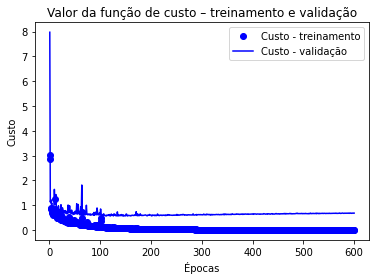

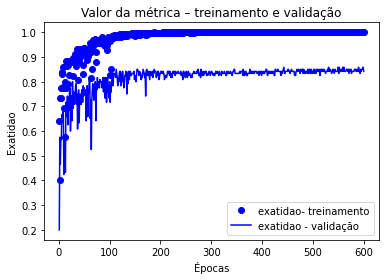

In [18]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores 
custo = history_dict['loss']
acc = history_dict['acc']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_acc']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e estabiliza em um valor de cerca de 0,01.
- O valor do custo para os dados de validação diminui até por volta da época 200 e depois aumenta levemente e estabiliza em um valor de cerca de 0,6, o que representa um resultado ruim.
- A exatidão obtida para os dados de treinamento é de 100%, enquanto que para os dados de validação é de cerca de 85%.

O grafico da função de custo durante o treinamento e os valores obtidos para a função de custo e para a métrica no final do treinamento mostram claramente que está ocorrendo overfitting dos dados de treinamento.

### Exercício #6: Cálculo do custo e métrica

Modifique a célula abaixo para calcular o custo e a exatidão para os dados de treinamento, validação e teste.

In [20]:
# PARA VOCÊ FAZER: calculo do custo e a exatidão para os dados de treinamento, validação e teste

# Usando o método evaluate calcule o custo e a exatidão
### COMECE AQUI ### (≈ 3 linhas)
custo_e_metricas_train = rna.evaluate(X_train_flat, Y_train_hot, batch_size=1)
custo_e_metricas_val = rna.evaluate(X_val_flat, Y_val_hot, batch_size=1)
custo_e_metricas_test = rna.evaluate(X_test_flat, Y_test_hot, batch_size=1)
### TERMINE AQUI ###

print('Dados de treinamento: ', custo_e_metricas_train)
print('Dados de validação: ', custo_e_metricas_val)
print('Dados de teste: ', custo_e_metricas_test)

120/120 [==============================] - 0s 1ms/step - loss: 0.5401 - acc: 0.8833
Dados de treinamento:  [0.006661918479949236, 1.0]
Dados de validação:  [0.6839072108268738, 0.8416666388511658]
Dados de teste:  [0.5400708317756653, 0.8833333253860474]


**Exemplo de saída esperada:**

    960/960 [==============================] - 0s 102us/sample - loss: 0.0084 - acc: 1.0000
    120/120 [==============================] - 0s 116us/sample - loss: 0.6543 - acc: 0.8333
    120/120 [==============================] - 0s 108us/sample - loss: 0.4546 - acc: 0.8833
    Dados de treinamento:  [0.008386460474381845, 1.0]
    Dados de validação:  [0.654319644967715, 0.8333333]
    Dados de teste:  [0.4546472152074178, 0.8833333]

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e estabiliza em um valor de cerca de 0,01.
- O valor do custo para os dados de validação diminui até por volta da época 200 e depois aumenta levemente e estabiliza em um valor de cerca de 0,6, o que representa um resultado ruim.
- A exatidão obtida para os dados de treinamento é de 100%, enquanto que para os dados de validação é de cerca de 83% e de teste cerca de 88%.

O grafico da função de custo durante o treinamento e os valores obtidos para a função de custo e para a métrica no final do treinamento mostram claramente que está ocorrendo overfitting dos dados de treinamento.

## 4 - Teste da RNA

### Exercício #7: Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA para as imagens dos dados de teste e depois verifique se algumas dessas previsões estão corretas. 

Note que a previsão da RNA é um vetor de 6 elementos com as probabilidades da imagem mostrar os seis sinais. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 5, que representa o sinal sendo mostrado. Para fazer essa transformação use a função numpy `argmax(Y_test, axis=?)`, onde Y_test é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Troque a variável index (variando entre 0 e 119) para verificar se a sua RNA consegue classificar corretamente o sinal de mão mostrado nas imagens.

y = 5


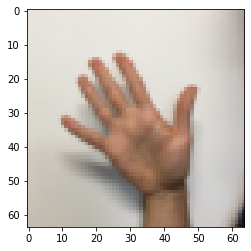

In [37]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA com dropout

# Calculo das previsões da RNA
### COMECE AQUI ### (≈ 1 linha)
Y_test = np.argmax(Y_test_hot, axis=1)
### TERMINE AQUI ###

# Cálculo das classes previstas
### COMECE AQUI ### (≈ 1 linha)
classe = np.argmax(rna.predict(X_test_flat), axis=1)
### TERMINE AQUI ###

# Exemplo de uma imagem dos dados de teste
index = 3
plt.imshow(X_test_orig[index])
print ("y = " + str(np.squeeze(classe[index])))

### Exercício #8: Visualização dos resultados

Na célula abaixo crie um código para fazer um gráfico com as classes reais e as previstas pela sua RNA para todos os exemplos do connjunto de teste.

Dimensão vetor classes reais=  (1, 120)
Dimensão vetor classes previstas=  (120,)


<Figure size 1296x432 with 0 Axes>

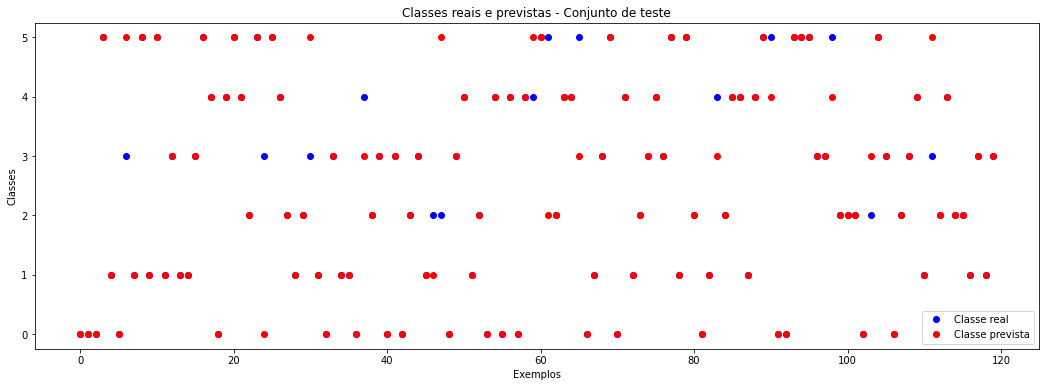

In [39]:
# PARA VOCÊ FAZER: cálculo das classes previstas pela RNA com dropout

# Resultado gráfico
# Verifique dimensoes dos vetores de classes reais e previstas
print('Dimensão vetor classes reais= ', Y_test_orig.shape)
print('Dimensão vetor classes previstas= ', classe.shape)

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(18, 6))
### COMECE AQUI ### (≈ 7 linhas)
plt.figure(figsize=(18, 6))
plt.plot(Y_test, 'bo', label='Classe real')
plt.plot(classe, 'ro', label='Classe prevista')
plt.title('Classes reais e previstas - Conjunto de teste')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()
### TERMINE AQUI ###


**Saída prevista:**

    Dimensão vetor classes reais=  (1, 120)
    Dimensão vetor classes previstas=  (120,)

<img src="https://github.com/pigortekids/Notas4/blob/master/T6/classe_reais_previstas.png?raw=1">

## 8 - Conclusão

Uma das conclusões desse trabalho é que obter uma RNA que apresenta um desempenho satisfatório para os dados de teste nem sempre é uma tarefa fácil.

Outra conclusão é que essa RNA com camadas densas possui quase 800.000 parâmetros para realizar uma tarefa simples de classificação de múltiplas classes em imagens. Esse número de parâmetros é muito grande para essa tarefa que não é muito complexa. Se tivéssemos usado imagens com dimensões maiores o número de paâmetros seria muito maior. Além disso, observa-se que quanto maior o número de parâmetros de uma RNA mais difícil é o seu treinamento e maiores são os problemas de overfitting